In [46]:
import pandas as pd 
import numpy as np


In [47]:
df=pd.read_csv("D:\\ARWINDD\\Downloads\\Aravind\\Sem6_Spring\\Machine Learning\\ML\\BostonHouse\\Projects\\Boston_House_Price_Prediction\\HousingData.csv")

In [48]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [49]:
df.shape

(506, 14)

In [50]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [51]:
df['MEDV'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [52]:
df['Price']=df['MEDV']
df.drop('MEDV',axis=1, inplace=True)

### summarizing the stats of the data

In [53]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [54]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

### Handling missing values

In [55]:
def handle_null(col):
    df[col]=df[col].fillna(df[col].mean())

In [56]:
cols=['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']
for col in cols:
    handle_null(col)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [57]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


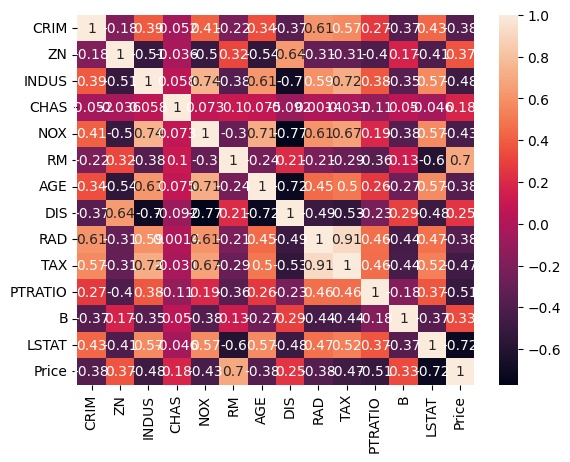

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
plt.show()

In [59]:
# sns.pairplot(df)
# plt.show()

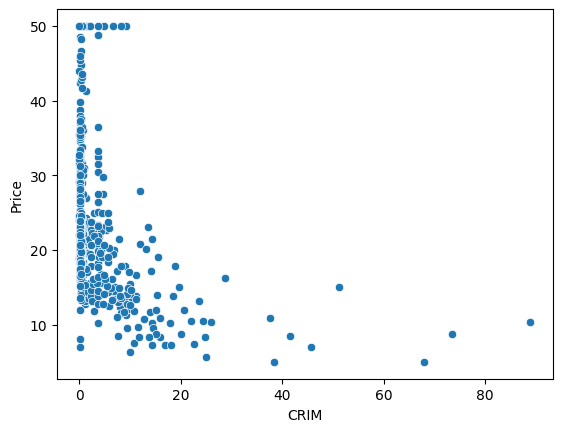

In [60]:
sns.scatterplot(x=df['CRIM'],y=df['Price'],data=df)
plt.show()

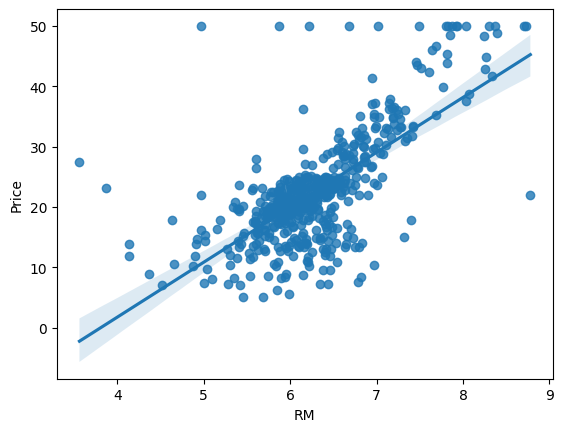

In [61]:
sns.regplot(x='RM',y='Price',data=df)
plt.show()

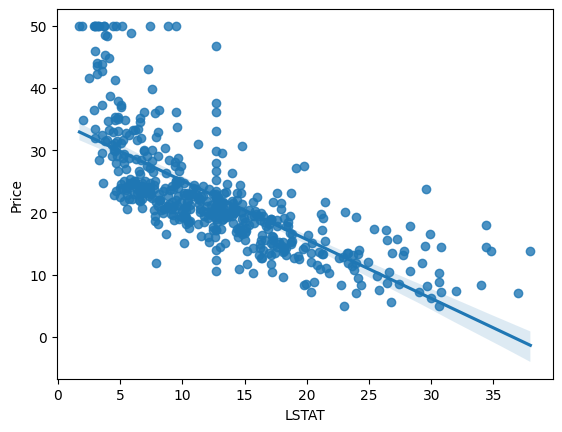

In [62]:
sns.regplot(x='LSTAT',y='Price',data=df)
plt.show()

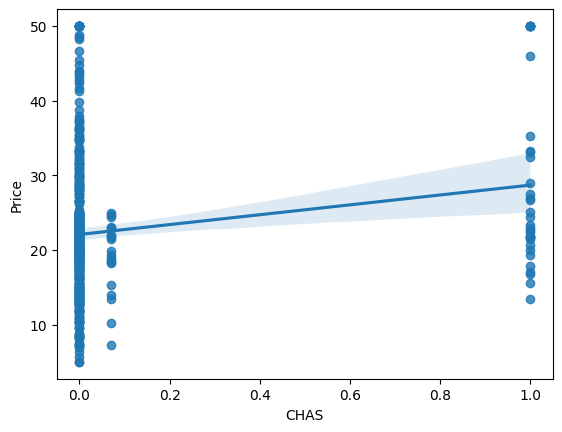

In [63]:
sns.regplot(x='CHAS',y='Price',data=df)
plt.show()

### Dividing independent and dependent features

In [64]:
X=df.drop('Price',axis=1)
y=df['Price']

In [65]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [67]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.510,6.416,68.518519,2.6463,5,296,16.6,395.50,9.040000
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.530000
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.070000
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.520000
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.100000,0.0,0.740,6.406,97.200000,2.0651,24,666,20.2,385.96,12.715432
23,0.98843,0.0,8.140000,0.0,0.538,5.813,100.000000,4.0952,4,307,21.0,394.54,19.880000
225,0.52693,0.0,6.200000,0.0,0.504,8.725,83.000000,2.8944,8,307,17.4,382.00,4.630000
433,5.58107,0.0,18.100000,0.0,0.713,6.436,87.900000,2.3158,24,666,20.2,100.19,16.220000


### Standard Scaler

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [69]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [70]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

### Model Training

In [71]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [72]:
reg.fit(X_train_scaled,y_train)

LinearRegression()

### print the coefficients and the intercept


In [73]:
print(reg.coef_)

[-1.06184703  0.71347682 -0.07272768  0.94344207 -1.62856223  3.17333232
 -0.70109167 -3.04177516  1.69879013 -1.20047368 -1.99733627  1.02127847
 -3.28653232]


In [74]:
print(reg.intercept_)

23.01581920903955


### On which parameters the model has been trained

In [75]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Predicting with test data

In [76]:
y_pred=reg.predict(X_test_scaled)

### Plot a scatter plot for the predictions

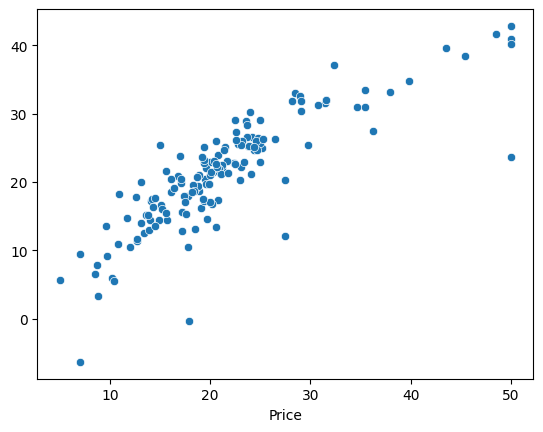

In [77]:
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

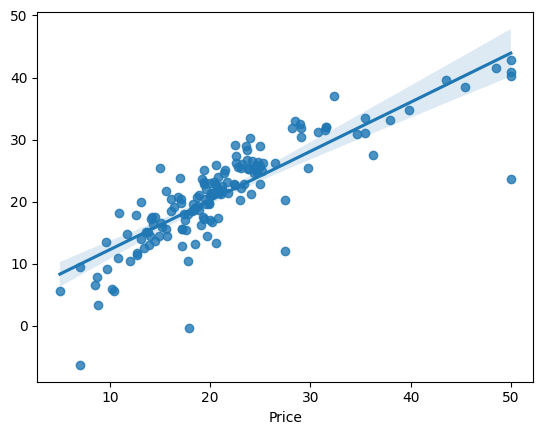

In [78]:
sns.regplot(x=y_test,y=y_pred,data=df)
plt.show()

### Residuals


In [79]:
residuals=y_test-y_pred
residuals.mean()

0.09535094771441188

### Plotting residuals
### normal distribution

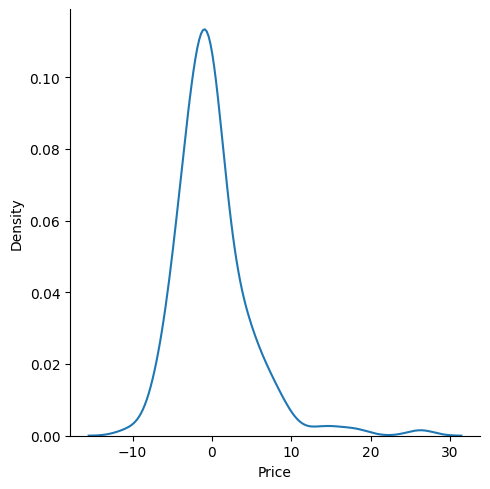

In [80]:
sns.displot(residuals,kind='kde')
plt.show()

### Scatter plot wrt predictions and residuals
### Constant variance/uniform distribution

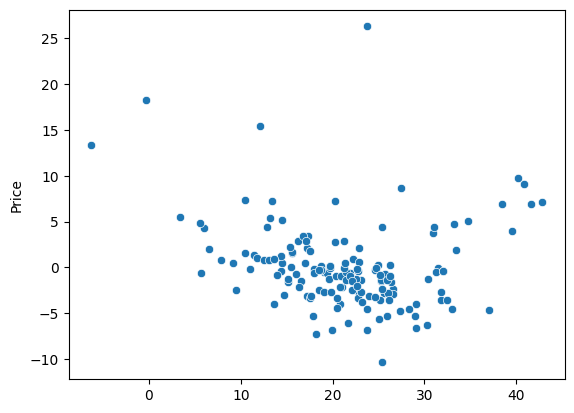

In [81]:
sns.scatterplot(x=y_pred,y=residuals)
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))


3.1410525671084675
21.818457953526043


### R Square and Adjusted R square

In [83]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7071862632031756


In [84]:
adj_score=1-(1-score)*(len(y_test)-1)/((len(y_test)-1)-X_test.shape[1])
adj_score

0.6796023604614457

In [85]:
X_test_scaled[0]
# reg.predict()

array([-0.41251638, -0.51161896,  0.00549984, -0.28851904, -0.40521827,
        0.12577051, -0.00827655, -0.52734802, -0.51436915, -0.66777595,
       -0.74457062,  0.41241246, -0.49460143])

In [86]:
reg.predict([[-0.41251638, -0.51161896,  0.00549984, -0.28851904, -0.40521827,
        0.12577051, -0.00827655, -0.52734802, -0.51436915, -0.66777595,
       -0.74457062,  0.41241246, -0.49460143]])

array([28.94684244])

## Pickling the model file for deployment

In [87]:
import pickle

In [88]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [89]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [90]:
pickled_model.predict([[-0.41251638, -0.51161896,  0.00549984, -0.28851904, -0.40521827,
        0.12577051, -0.00827655, -0.52734802, -0.51436915, -0.66777595,
       -0.74457062,  0.41241246, -0.49460143]])

array([28.94684244])